<h1 style="text-align: center;">Predição de preços de casas na Califórnia</h1>

<img title="a title" alt="Alt text" src="https://i0.wp.com/calmatters.org/wp-content/uploads/2022/03/housing.jpg?fit=2263%2C1325&ssl=1">

Neste projeto, vamos utilizar técnicas de regressão linear com a biblioteca scikit-learn do Python para prever os preços de casas na Califórnia. O objetivo é entender quais características de uma casa (como número de quartos, área construída, localização etc.) influenciam o seu valor de mercado.

Para começarmos, é importante destacar que o conjunto de dados utilizado foi retirado do Kaggle e é referente ao censo de 1990. Utilizaremos técnicas de limpeza e pré-processamento dos dados para que eles estejam prontos para a análise.

Em seguida, vamos utilizar a regressão linear para modelar a relação entre as características da casa e o seu preço de mercado. Para avaliar a qualidade do modelo, vamos utilizar métricas como R² e RMSE.

Por fim, vamos analisar os resultados e entender quais características têm mais influência no preço de mercado das casas na Califórnia. Isso pode ser útil para profissionais do mercado imobiliário, investidores e até mesmo para pessoas que estão em busca de uma casa para comprar.

É importante salientar que, mesmo que o modelo seja baseado em dados históricos, ele pode ser útil para a tomada de decisão atual. Porém, é preciso estar ciente de que há variáveis não contempladas no modelo, como a conjuntura econômica e política atual, que podem impactar nos preços das casas.

## Descrição do banco de dados

O *dataset* que utilizaremos possui as seguintes variáveis:

- Longitude: longitude de um determinado conjunto de casas.
- Latitude: latitude de um determinado conjunto de casas.
- Housing median age: idade mediana das casas.
- Total rooms: total de quartos.
- Total bedrooms: total de quartos para dormir.
- Population: população da localidade.
- Households: número total de famílias, grupos de pessoas residindo em uma unidades domiciliar, por um quarteirão.
- Median income: renda mediana da localidade.
- Ocean proximity: Proximidade com o oceano (menos de uma hora para chegar no oceano; terrestre; perto do oceano; perto de uma baía; em uma ilha).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectPercentile, f_classif, SelectKBest
from sklearn.decomposition import PCA

In [2]:
housing = pd.read_csv('housing.csv')
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
def has_na(df: pd.DataFrame):
    return df.isna().sum()
def has_dupl(df: pd.DataFrame):
    return df.duplicated().sum()
def check_df(df: pd.DataFrame):
    print(f"[*] Checking for NA: \n{has_na(df)} \n\n[*] Duplicated: {has_dupl(df)}")

def get_na(df :pd.DataFrame): return df[df.isnull().any(axis=1)]

In [5]:
check_df(housing)

[*] Checking for NA: 
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64 

[*] Duplicated: 0


In [6]:
housing.columns = housing.columns.str.replace('latitude', 'lat')
housing.columns = housing.columns.str.replace('longitude', 'lon')

## Entendendo os dados

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   lon                 20640 non-null  float64
 1   lat                 20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing.nunique().sort_values()

ocean_proximity           5
housing_median_age       52
lon                     844
lat                     862
households             1815
total_bedrooms         1923
median_house_value     3842
population             3888
total_rooms            5926
median_income         12928
dtype: int64

Não existe nenhumma coluna binária

In [9]:
max_age = housing.housing_median_age.max()
min_age = housing.housing_median_age.min()

print(f"Esse dataset possui conjuntos de casas cuja idade mediana (das construções) está entre {min_age} and {max_age} years")

Esse dataset possui conjuntos de casas cuja idade mediana (das construções) está entre 1.0 and 52.0 years


In [10]:
max_value = housing.median_house_value.max()
min_value = housing.median_house_value.min()

print(f"Esse dataset possui conjuntos de casas cujo preço mediano está entre {min_value} and {max_value}")

Esse dataset possui conjuntos de casas cujo preço mediano está entre 14999.0 and 500001.0


Resumo sobre as variáveis quantitativas:

In [11]:
housing.describe().drop(columns=['lon', 'lat']).T

count           mean            std         min  \
housing_median_age  20640.0      28.639486      12.585558      1.0000   
total_rooms         20640.0    2635.763081    2181.615252      2.0000   
total_bedrooms      20433.0     537.870553     421.385070      1.0000   
population          20640.0    1425.476744    1132.462122      3.0000   
households          20640.0     499.539680     382.329753      1.0000   
median_income       20640.0       3.870671       1.899822      0.4999   
median_house_value  20640.0  206855.816909  115395.615874  14999.0000   

                            25%          50%           75%          max  
housing_median_age      18.0000      29.0000      37.00000      52.0000  
total_rooms           1447.7500    2127.0000    3148.00000   39320.0000  
total_bedrooms         296.0000     435.0000     647.00000    6445.0000  
population             787.0000    1166.0000    1725.00000   35682.0000  
households             280.0000     409.0000     605.00000    6082.0000  
median_income            2.5634       3.5348       4.74325      15.0001  
median_house_value  119600.0000  179700.0000  264725.00000  500001.0000

Maiores valores medianos:

In [12]:
housing.median_house_value.nlargest(3)

89     500001.0
459    500001.0
493    500001.0
Name: median_house_value, dtype: float64

Maiores rendas:

In [13]:
housing.median_income.nlargest(3)

1566    15.0001
4352    15.0001
4604    15.0001
Name: median_income, dtype: float64

In [14]:
housing.query(f"median_income in {housing.median_income.nsmallest(3).to_list()} or population in {housing.population.nlargest(3).to_list()}")

lon    lat  housing_median_age  total_rooms  total_bedrooms  \
73    -122.29  37.81                46.0         12.0             4.0   
3249  -119.99  36.09                23.0        333.0            92.0   
3258  -122.89  39.42                16.0        411.0           114.0   
4861  -118.28  34.02                29.0        515.0           229.0   
5213  -118.28  33.93                52.0        117.0            33.0   
6343  -117.75  34.06                52.0         62.0             9.0   
6688  -118.08  34.15                28.0        238.0            58.0   
7125  -118.04  33.90                36.0         15.0             5.0   
9880  -121.79  36.64                11.0      32627.0          6445.0   
13139 -121.44  38.43                 3.0      39320.0          6210.0   
13999 -116.90  34.69                10.0        337.0           102.0   
15360 -117.42  33.35                14.0      25135.0          4819.0   
19523 -121.01  37.65                52.0        178.0            53.0   
19800 -123.32  40.43                15.0        661.0           146.0   
20091 -120.19  38.07                43.0        102.0            19.0   

       population  households  median_income  median_house_value  \
73           18.0         7.0         0.4999             67500.0   
3249        198.0        55.0         0.4999            100000.0   
3258         26.0        19.0         0.4999             73500.0   
4861       2690.0       217.0         0.4999            500001.0   
5213         74.0        45.0         0.4999             90600.0   
6343         44.0        16.0         0.4999            112500.0   
6688        142.0        31.0         0.4999            500001.0   
7125         15.0         6.0         0.4999            162500.0   
9880      28566.0      6082.0         2.3087            118800.0   
13139     16305.0      5358.0         4.9516            153700.0   
13999       108.0        50.0         0.4999             55000.0   
15360     35682.0      4769.0         2.5729            134400.0   
19523       152.0        62.0         0.4999             82500.0   
19800       131.0        57.0         0.4999             56700.0   
20091        44.0        13.0         0.4999            162500.0   

      ocean_proximity  
73           NEAR BAY  
3249           INLAND  
3258           INLAND  
4861        <1H OCEAN  
5213        <1H OCEAN  
6343           INLAND  
6688           INLAND  
7125        <1H OCEAN  
9880        <1H OCEAN  
13139          INLAND  
13999          INLAND  
15360       <1H OCEAN  
19523          INLAND  
19800          INLAND  
20091          INLAND

In [15]:
housing.nsmallest(4, 'total_rooms')

lon    lat  housing_median_age  total_rooms  total_bedrooms  \
3126  -117.79  35.21                 4.0          2.0             2.0   
12286 -116.95  33.86                 1.0          6.0             2.0   
16171 -122.50  37.79                52.0          8.0             1.0   
5916  -118.44  34.28                46.0         11.0            11.0   

       population  households  median_income  median_house_value  \
3126          6.0         2.0         2.3750            137500.0   
12286         8.0         2.0         1.6250             55000.0   
16171        13.0         1.0        15.0001            500001.0   
5916         24.0        13.0         2.8750            162500.0   

      ocean_proximity  
3126           INLAND  
12286          INLAND  
16171        NEAR BAY  
5916        <1H OCEAN

In [16]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## Exploratory Data Analysis

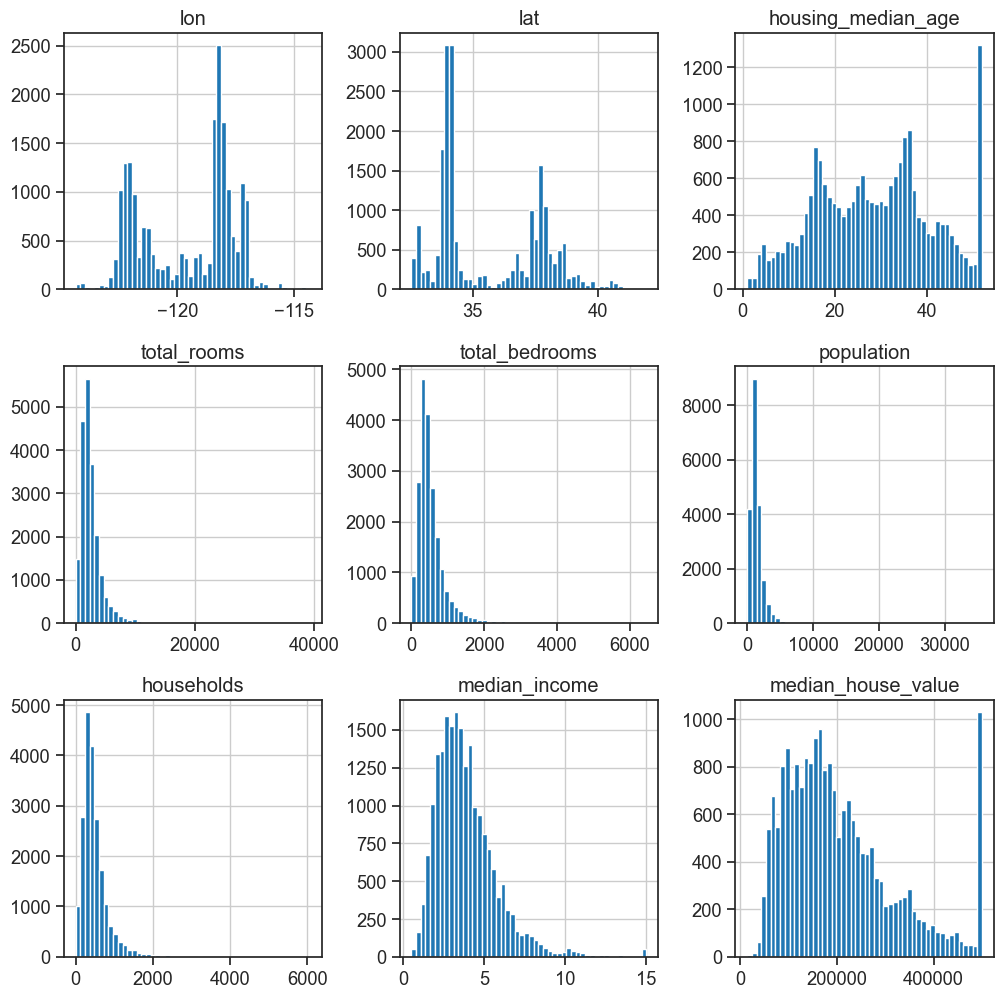

In [122]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(12, 12))
plt.show()

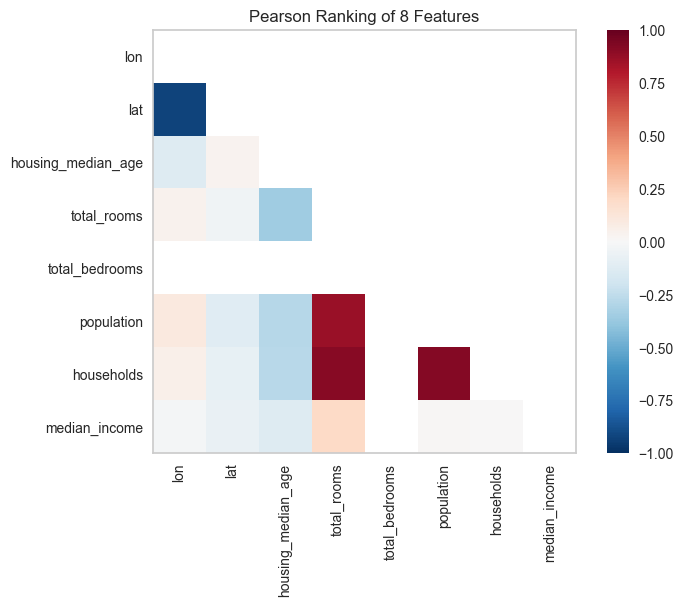

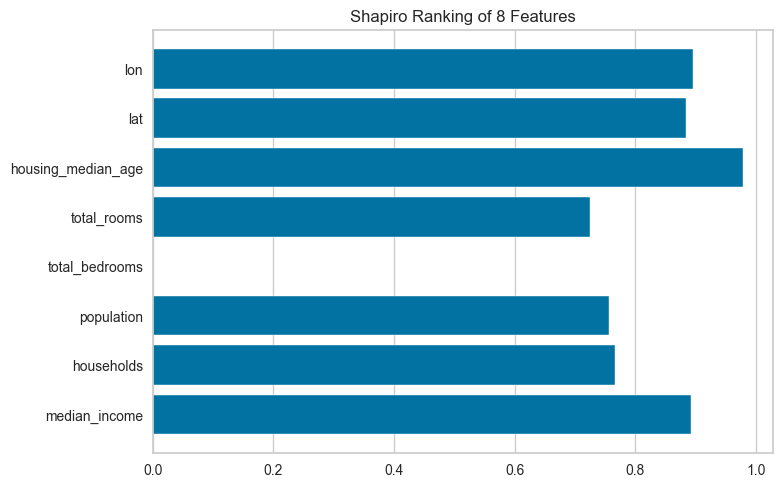

<AxesSubplot:title={'center':'Shapiro Ranking of 8 Features'}>

In [148]:
from yellowbrick.features import Rank2D, Rank1D


sample = housing.sample(3000)

numeric_features = sample.select_dtypes('number').drop(columns='median_house_value')
y = sample.median_house_value

visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(numeric_features)
visualizer.show()


viz_1d = Rank1D(algorithm='shapiro')
viz_1d.fit_transform(numeric_features, y=y)
viz_1d.show()

Será que quanto mais perto do mar, mais antiga a habitação?

In [18]:
housing.groupby("ocean_proximity").housing_median_age.agg(mean_median_age='mean', median_median_age='median', std_median_age = 'std', max_median_age = 'max', min_median_age = 'min').reset_index().sort_values(by='mean_median_age')

ocean_proximity  mean_median_age  median_median_age  std_median_age  \
1          INLAND        24.271867               23.0       12.018020   
0       <1H OCEAN        29.279225               30.0       11.644453   
4      NEAR OCEAN        29.347254               29.0       11.840371   
3        NEAR BAY        37.730131               39.0       13.070385   
2          ISLAND        42.400000               52.0       13.164346   

   max_median_age  min_median_age  
1            52.0             1.0  
0            52.0             2.0  
4            52.0             2.0  
3            52.0             2.0  
2            52.0            27.0

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_income'>

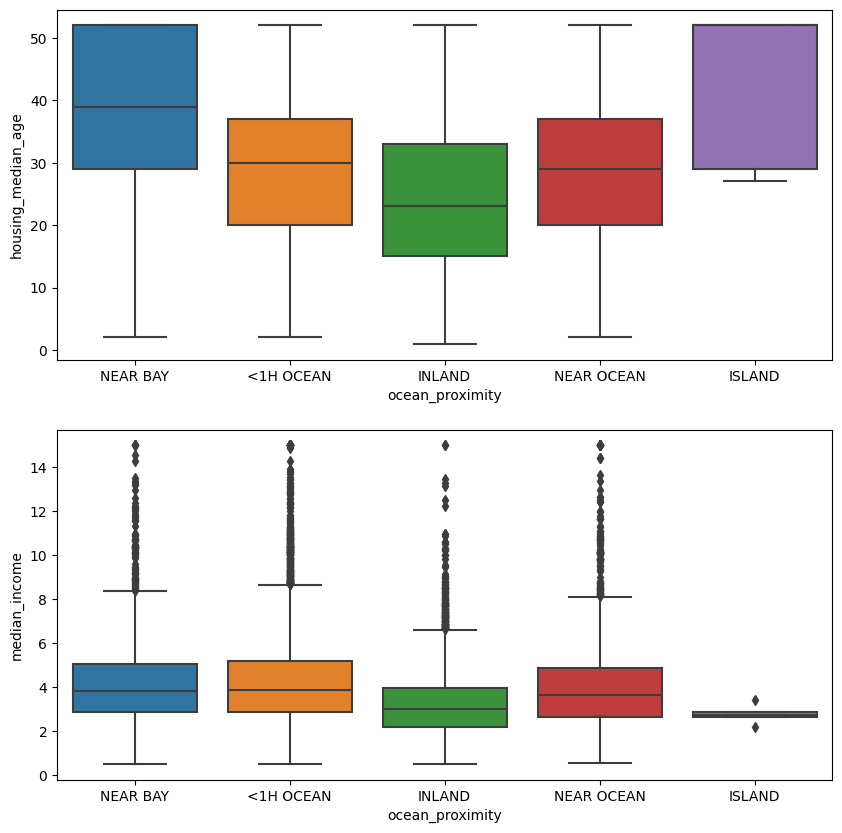

In [19]:
fig, axes = plt.subplots(2, 1, figsize=(10,10))

sns.boxplot(data=housing, x='ocean_proximity', y='housing_median_age', ax=axes[0])
sns.boxplot(data=housing, x='ocean_proximity', y='median_income', ax=axes[1])

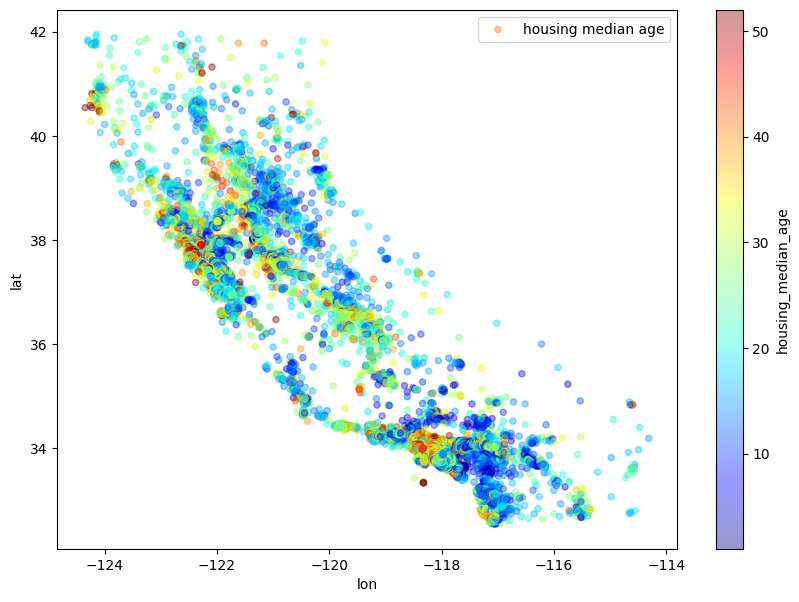

In [20]:
housing.plot(kind="scatter", x="lon", y="lat", alpha=0.4, label="housing median age", figsize=(10,7), 
        c="housing_median_age", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

É possível verificar que casas mais velhas estão situadas no litoral.

In [21]:
housing.groupby('ocean_proximity').agg(
    {'median_house_value': ['mean', 'median', 'std', 'sum'],
     'population': ['mean', 'median', 'std', 'sum']}
)

median_house_value                                         \
                              mean    median            std           sum   
ocean_proximity                                                             
<1H OCEAN            240084.285464  214850.0  106124.292213  2.193410e+09   
INLAND               124805.392001  108500.0   70007.908494  8.176001e+08   
ISLAND               380440.000000  414700.0   80559.561816  1.902200e+06   
NEAR BAY             259212.311790  233800.0  122818.537064  5.935962e+08   
NEAR OCEAN           249433.977427  229450.0  122477.145927  6.629955e+08   

                  population                                   
                        mean  median          std         sum  
ocean_proximity                                                
<1H OCEAN        1520.290499  1247.0  1185.848357  13889374.0  
INLAND           1391.046252  1124.0  1168.670126   9112744.0  
ISLAND            668.000000   733.0   301.691067      3340.0  
NEAR BAY         1230.317467  1033.5   885.899035   2817427.0  
NEAR OCEAN       1354.008653  1136.5  1005.563166   3598955.0

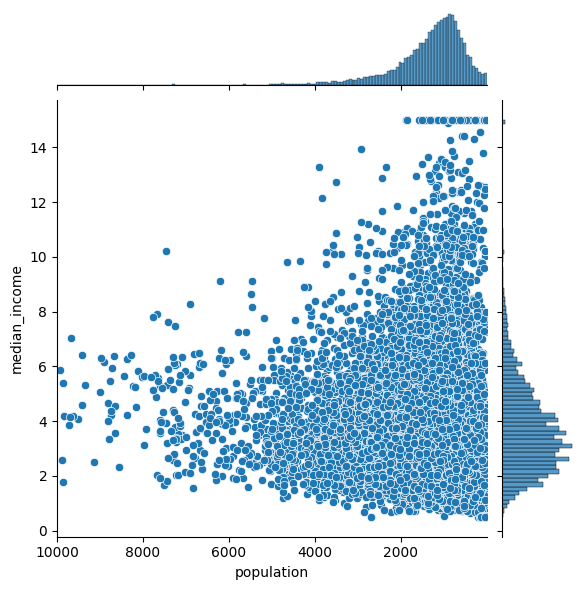

In [22]:
sns.jointplot(data=housing, x='population', y='median_income', xlim=10000)

Não parece existir uma relação entre população e renda.

<AxesSubplot:xlabel='ocean_proximity', ylabel='households'>

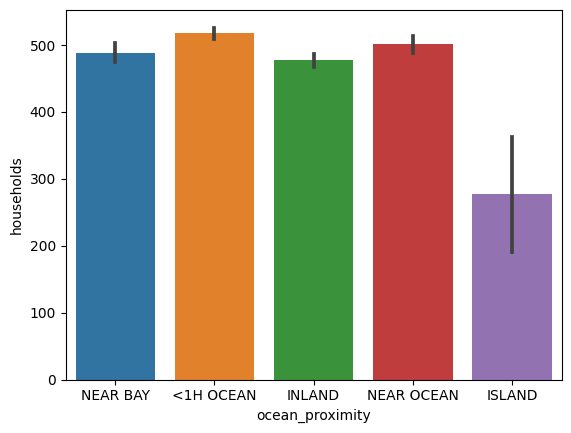

In [23]:
sns.barplot(data=housing, x='ocean_proximity', y='households')

## Análise do valor mediano das casas (alvo)

Será que a proximidade com o oceano influencia o valor mediano?

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

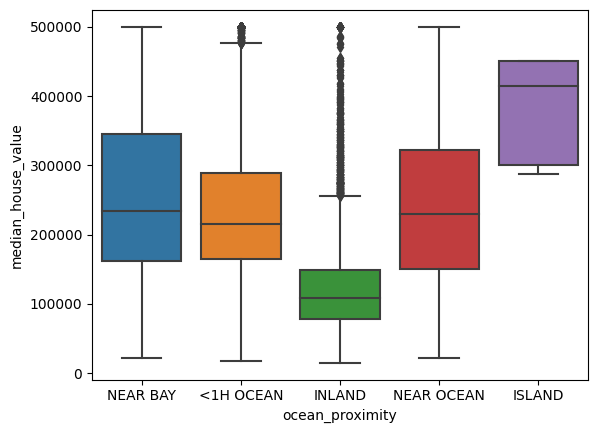

In [24]:
sns.boxplot(data=housing, x='ocean_proximity', y='median_house_value')

<AxesSubplot:xlabel='ocean_proximity', ylabel='population'>

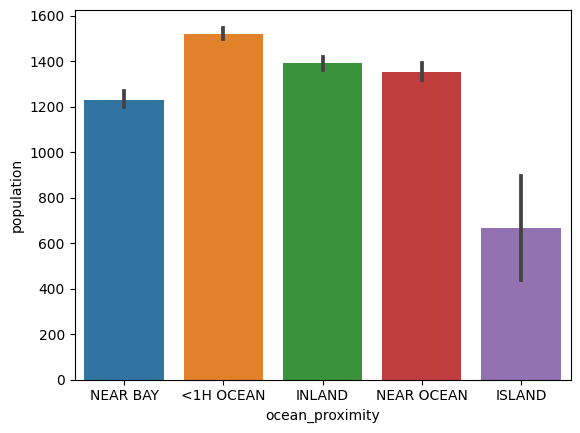

In [25]:
sns.barplot(data=housing, x='ocean_proximity', y='population', estimator='mean')

Aparentemente quanto mais perto do oceano, maior o preço. Casas em ilhas são mais caras e tem população pequena.

<AxesSubplot:xlabel='lon', ylabel='lat'>

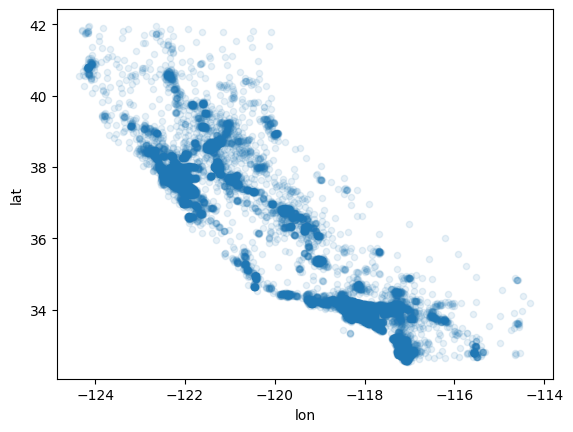

In [26]:
housing.plot(kind="scatter", x="lon", y="lat", alpha=0.1)

População concentrada no litoral.

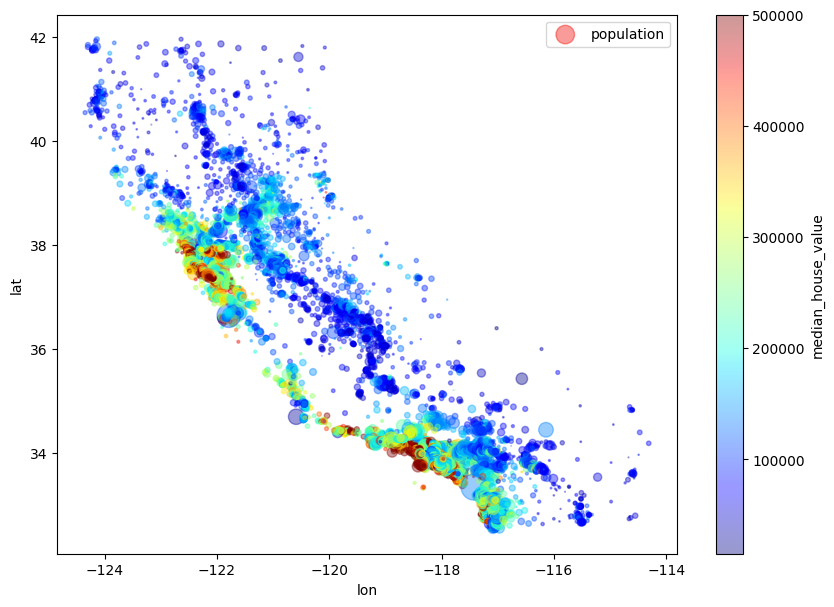

In [27]:
housing.plot(kind="scatter", x="lon", y="lat", alpha=0.4,     
        s=housing["population"]/100, label="population", figsize=(10,7), 
        c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

Tem mais população e as casas são mais caras no litoral.

Existe uma relação entre renda e o preço da casa?

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

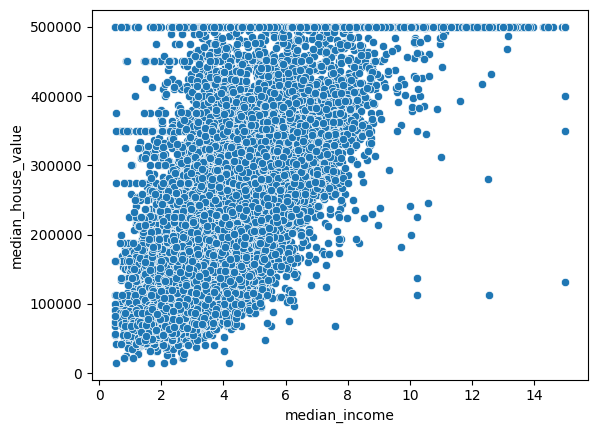

In [28]:
sns.scatterplot(data=housing, x='median_income', y='median_house_value')

Parece haver uma relação positiva entre os *features*.

<Figure size 1500x1000 with 0 Axes>

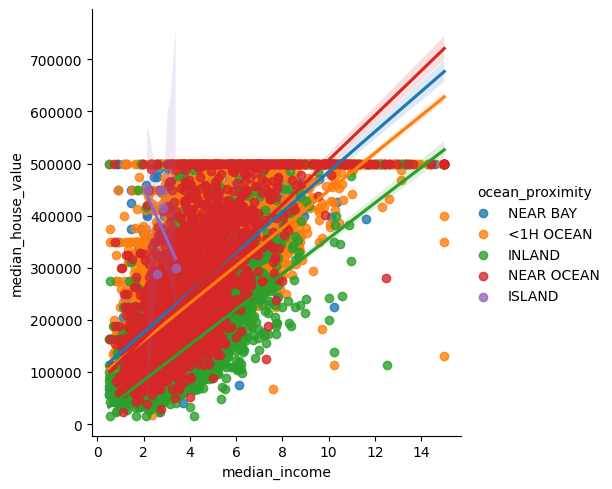

In [29]:
plt.figure(figsize=(15, 10))
sns.lmplot(data=housing, x='median_income', y='median_house_value', hue='ocean_proximity')
plt.show()


Parece que quanto mais perto do litoral, maior a inclinação da reta.

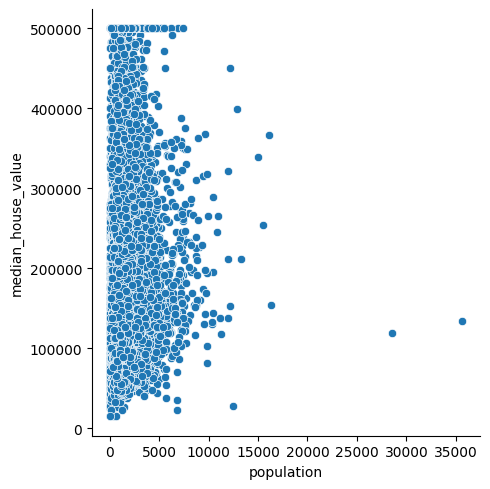

In [30]:
sns.relplot(data=housing, x='population', y='median_house_value')

Doesn't look like there is any relationship between the population and the median_house_value.

But the map says something different... Maybe there is more population in the coast and the median house value is bigger too, but they're not related directly.

## Adicionando uma nova coluna: cidade mais próxima

In [31]:
housing.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [32]:
import geopandas as gpd

In [33]:
geometry_housing = gpd.points_from_xy(housing['lon'], housing['lat'])
points_housing = gpd.GeoDataFrame(housing, geometry=geometry_housing)

In [34]:
california_cities = pd.read_csv('cal_cities_lat_long.csv')
california_cities.head(5)

Name   Latitude   Longitude
0      Adelanto  34.582769 -117.409214
1  Agoura Hills  34.153339 -118.761675
2       Alameda  37.765206 -122.241636
3        Albany  37.886869 -122.297747
4      Alhambra  34.095286 -118.127014

In [35]:
geometry_cal = gpd.points_from_xy(california_cities['Longitude'], california_cities['Latitude'])
points_cal = gpd.GeoDataFrame(california_cities, geometry=geometry_cal)

In [36]:
joined_data = gpd.sjoin_nearest(points_housing,points_cal, how='left', distance_col='distance_nearest_city')
joined_data

lon    lat  housing_median_age  total_rooms  total_bedrooms  \
0     -122.23  37.88                41.0        880.0           129.0   
1     -122.22  37.86                21.0       7099.0          1106.0   
2     -122.24  37.85                52.0       1467.0           190.0   
3     -122.25  37.85                52.0       1274.0           235.0   
4     -122.25  37.85                52.0       1627.0           280.0   
...       ...    ...                 ...          ...             ...   
20635 -121.09  39.48                25.0       1665.0           374.0   
20636 -121.21  39.49                18.0        697.0           150.0   
20637 -121.22  39.43                17.0       2254.0           485.0   
20638 -121.32  39.43                18.0       1860.0           409.0   
20639 -121.24  39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity                     geometry  index_right          Name  \
0            NEAR BAY  POINT (-122.23000 37.88000)           34      Berkeley   
1            NEAR BAY  POINT (-122.22000 37.86000)          303      Piedmont   
2            NEAR BAY  POINT (-122.24000 37.85000)          303      Piedmont   
3            NEAR BAY  POINT (-122.25000 37.85000)           34      Berkeley   
4            NEAR BAY  POINT (-122.25000 37.85000)           34      Berkeley   
...               ...                          ...          ...           ...   
20635          INLAND  POINT (-121.09000 39.48000)          269   Nevada City   
20636          INLAND  POINT (-121.21000 39.49000)          269   Nevada City   
20637          INLAND  POINT (-121.22000 39.43000)          154  Grass Valley   
20638          INLAND  POINT (-121.32000 39.43000)          286      Oroville   
20639          INLAND  POINT (-121.24000 39.37000)          154  Grass Valley   

        Latitude   Longitude  distance_nearest_city  
0      37.871592 -122.272747               0.043566  
1      37.824372 -122.231636               0.037480  
2      37.824372 -122.231636               0.026958  
3      37.871592 -122.272747               0.031363  
4      37.871592 -122.272747               0.031363  
...          ...         ...                    ...  
20635  39.261561 -121.016058               0.230614  
20636  39.261561 -121.016058               0.299663  
20637  39.219061 -121.061061               0.264115  
20638  39.513775 -121.556358               0.250766  
20639  39.219061 -121.061061               0.234098  

[20773 rows x 16 columns]

In [37]:
joined_data = joined_data.rename(columns={'Name': 'nearest_city'})

In [38]:
get_na(joined_data)

lon    lat  housing_median_age  total_rooms  total_bedrooms  \
290   -122.16  37.77                47.0       1256.0             NaN   
341   -122.17  37.75                38.0        992.0             NaN   
538   -122.28  37.78                29.0       5154.0             NaN   
563   -122.24  37.75                45.0        891.0             NaN   
696   -122.10  37.69                41.0        746.0             NaN   
...       ...    ...                 ...          ...             ...   
20267 -119.19  34.20                18.0       3620.0             NaN   
20268 -119.18  34.19                19.0       2393.0             NaN   
20372 -118.88  34.17                15.0       4260.0             NaN   
20460 -118.75  34.29                17.0       5512.0             NaN   
20484 -118.72  34.28                17.0       3051.0             NaN   

       population  households  median_income  median_house_value  \
290         570.0       218.0         4.3750            161900.0   
341         732.0       259.0         1.6196             85100.0   
538        3741.0      1273.0         2.5762            173400.0   
563         384.0       146.0         4.9489            247100.0   
696         387.0       161.0         3.9063            178400.0   
...           ...         ...            ...                 ...   
20267      3171.0       779.0         3.3409            220500.0   
20268      1938.0       762.0         1.6953            167400.0   
20372      1701.0       669.0         5.1033            410700.0   
20460      2734.0       814.0         6.6073            258100.0   
20484      1705.0       495.0         5.7376            218600.0   

      ocean_proximity                     geometry  index_right  \
290          NEAR BAY  POINT (-122.16000 37.77000)          359   
341          NEAR BAY  POINT (-122.17000 37.75000)          359   
538          NEAR BAY  POINT (-122.28000 37.78000)          277   
563          NEAR BAY  POINT (-122.24000 37.75000)            2   
696          NEAR BAY  POINT (-122.10000 37.69000)          164   
...               ...                          ...          ...   
20267      NEAR OCEAN  POINT (-119.19000 34.20000)          287   
20268      NEAR OCEAN  POINT (-119.18000 34.19000)          287   
20372       <1H OCEAN  POINT (-118.88000 34.17000)          443   
20460       <1H OCEAN  POINT (-118.75000 34.29000)          391   
20484       <1H OCEAN  POINT (-118.72000 34.28000)          391   

           nearest_city   Latitude   Longitude  distance_nearest_city  
290         San Leandro  37.724931 -122.156078               0.045239  
341         San Leandro  37.724931 -122.156078               0.028675  
538             Oakland  37.804364 -122.271114               0.025934  
563             Alameda  37.765206 -122.241636               0.015294  
696             Hayward  37.668819 -122.080797               0.028590  
...                 ...        ...         ...                    ...  
20267            Oxnard  34.197506 -119.177053               0.013185  
20268            Oxnard  34.197506 -119.177053               0.008064  
20372  Westlake Village  34.145839 -118.805647               0.078180  
20460       Simi Valley  34.269447 -118.781483               0.037598  
20484       Simi Valley  34.269447 -118.781483               0.062382  

[209 rows x 16 columns]

In [39]:
joined_housing=joined_data.drop(columns=['geometry', 'index_right','Latitude','Longitude'])

In [40]:
get_na(joined_housing)

lon    lat  housing_median_age  total_rooms  total_bedrooms  \
290   -122.16  37.77                47.0       1256.0             NaN   
341   -122.17  37.75                38.0        992.0             NaN   
538   -122.28  37.78                29.0       5154.0             NaN   
563   -122.24  37.75                45.0        891.0             NaN   
696   -122.10  37.69                41.0        746.0             NaN   
...       ...    ...                 ...          ...             ...   
20267 -119.19  34.20                18.0       3620.0             NaN   
20268 -119.18  34.19                19.0       2393.0             NaN   
20372 -118.88  34.17                15.0       4260.0             NaN   
20460 -118.75  34.29                17.0       5512.0             NaN   
20484 -118.72  34.28                17.0       3051.0             NaN   

       population  households  median_income  median_house_value  \
290         570.0       218.0         4.3750            161900.0   
341         732.0       259.0         1.6196             85100.0   
538        3741.0      1273.0         2.5762            173400.0   
563         384.0       146.0         4.9489            247100.0   
696         387.0       161.0         3.9063            178400.0   
...           ...         ...            ...                 ...   
20267      3171.0       779.0         3.3409            220500.0   
20268      1938.0       762.0         1.6953            167400.0   
20372      1701.0       669.0         5.1033            410700.0   
20460      2734.0       814.0         6.6073            258100.0   
20484      1705.0       495.0         5.7376            218600.0   

      ocean_proximity      nearest_city  distance_nearest_city  
290          NEAR BAY       San Leandro               0.045239  
341          NEAR BAY       San Leandro               0.028675  
538          NEAR BAY           Oakland               0.025934  
563          NEAR BAY           Alameda               0.015294  
696          NEAR BAY           Hayward               0.028590  
...               ...               ...                    ...  
20267      NEAR OCEAN            Oxnard               0.013185  
20268      NEAR OCEAN            Oxnard               0.008064  
20372       <1H OCEAN  Westlake Village               0.078180  
20460       <1H OCEAN       Simi Valley               0.037598  
20484       <1H OCEAN       Simi Valley               0.062382  

[209 rows x 12 columns]

In [41]:
joined_housing

lon    lat  housing_median_age  total_rooms  total_bedrooms  \
0     -122.23  37.88                41.0        880.0           129.0   
1     -122.22  37.86                21.0       7099.0          1106.0   
2     -122.24  37.85                52.0       1467.0           190.0   
3     -122.25  37.85                52.0       1274.0           235.0   
4     -122.25  37.85                52.0       1627.0           280.0   
...       ...    ...                 ...          ...             ...   
20635 -121.09  39.48                25.0       1665.0           374.0   
20636 -121.21  39.49                18.0        697.0           150.0   
20637 -121.22  39.43                17.0       2254.0           485.0   
20638 -121.32  39.43                18.0       1860.0           409.0   
20639 -121.24  39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  nearest_city  distance_nearest_city  
0            NEAR BAY      Berkeley               0.043566  
1            NEAR BAY      Piedmont               0.037480  
2            NEAR BAY      Piedmont               0.026958  
3            NEAR BAY      Berkeley               0.031363  
4            NEAR BAY      Berkeley               0.031363  
...               ...           ...                    ...  
20635          INLAND   Nevada City               0.230614  
20636          INLAND   Nevada City               0.299663  
20637          INLAND  Grass Valley               0.264115  
20638          INLAND      Oroville               0.250766  
20639          INLAND  Grass Valley               0.234098  

[20773 rows x 12 columns]

## EDA: Part 2

In [42]:
joined_housing.nearest_city.value_counts()

San Francisco    408
San Fernando     369
San Diego        353
San Jose         306
Los Angeles      290
                ... 
McFarland          4
Montague           4
Tulelake           2
Amador City        2
Dorris             1
Name: nearest_city, Length: 458, dtype: int64

In [43]:
groupby_nearest_city = joined_housing.groupby('nearest_city').agg({"median_income":'median', "median_house_value":'median'}).sort_values(by='median_income')
groupby_nearest_city

median_income  median_house_value
nearest_city                                           
Huron                       1.50860             64700.0
Dorris                      1.74000             44000.0
Calipatria                  1.77270             50000.0
Vernon                      1.81055            109800.0
Needles                     1.82000             50000.0
...                             ...                 ...
Malibu                      7.91840            500001.0
Palos Verdes Estates        8.08975            500001.0
Rancho Palos Verdes         8.28310            500001.0
Saratoga                    8.36050            500001.0
Belvedere                   8.66370            500001.0

[458 rows x 2 columns]

In [44]:
groupby_nearest_city.corr()

median_income  median_house_value
median_income            1.000000            0.833427
median_house_value       0.833427            1.000000

In [45]:
joined_data

lon    lat  housing_median_age  total_rooms  total_bedrooms  \
0     -122.23  37.88                41.0        880.0           129.0   
1     -122.22  37.86                21.0       7099.0          1106.0   
2     -122.24  37.85                52.0       1467.0           190.0   
3     -122.25  37.85                52.0       1274.0           235.0   
4     -122.25  37.85                52.0       1627.0           280.0   
...       ...    ...                 ...          ...             ...   
20635 -121.09  39.48                25.0       1665.0           374.0   
20636 -121.21  39.49                18.0        697.0           150.0   
20637 -121.22  39.43                17.0       2254.0           485.0   
20638 -121.32  39.43                18.0       1860.0           409.0   
20639 -121.24  39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity                     geometry  index_right  nearest_city  \
0            NEAR BAY  POINT (-122.23000 37.88000)           34      Berkeley   
1            NEAR BAY  POINT (-122.22000 37.86000)          303      Piedmont   
2            NEAR BAY  POINT (-122.24000 37.85000)          303      Piedmont   
3            NEAR BAY  POINT (-122.25000 37.85000)           34      Berkeley   
4            NEAR BAY  POINT (-122.25000 37.85000)           34      Berkeley   
...               ...                          ...          ...           ...   
20635          INLAND  POINT (-121.09000 39.48000)          269   Nevada City   
20636          INLAND  POINT (-121.21000 39.49000)          269   Nevada City   
20637          INLAND  POINT (-121.22000 39.43000)          154  Grass Valley   
20638          INLAND  POINT (-121.32000 39.43000)          286      Oroville   
20639          INLAND  POINT (-121.24000 39.37000)          154  Grass Valley   

        Latitude   Longitude  distance_nearest_city  
0      37.871592 -122.272747               0.043566  
1      37.824372 -122.231636               0.037480  
2      37.824372 -122.231636               0.026958  
3      37.871592 -122.272747               0.031363  
4      37.871592 -122.272747               0.031363  
...          ...         ...                    ...  
20635  39.261561 -121.016058               0.230614  
20636  39.261561 -121.016058               0.299663  
20637  39.219061 -121.061061               0.264115  
20638  39.513775 -121.556358               0.250766  
20639  39.219061 -121.061061               0.234098  

[20773 rows x 16 columns]

0.03681592406959757 0.21479600866014117


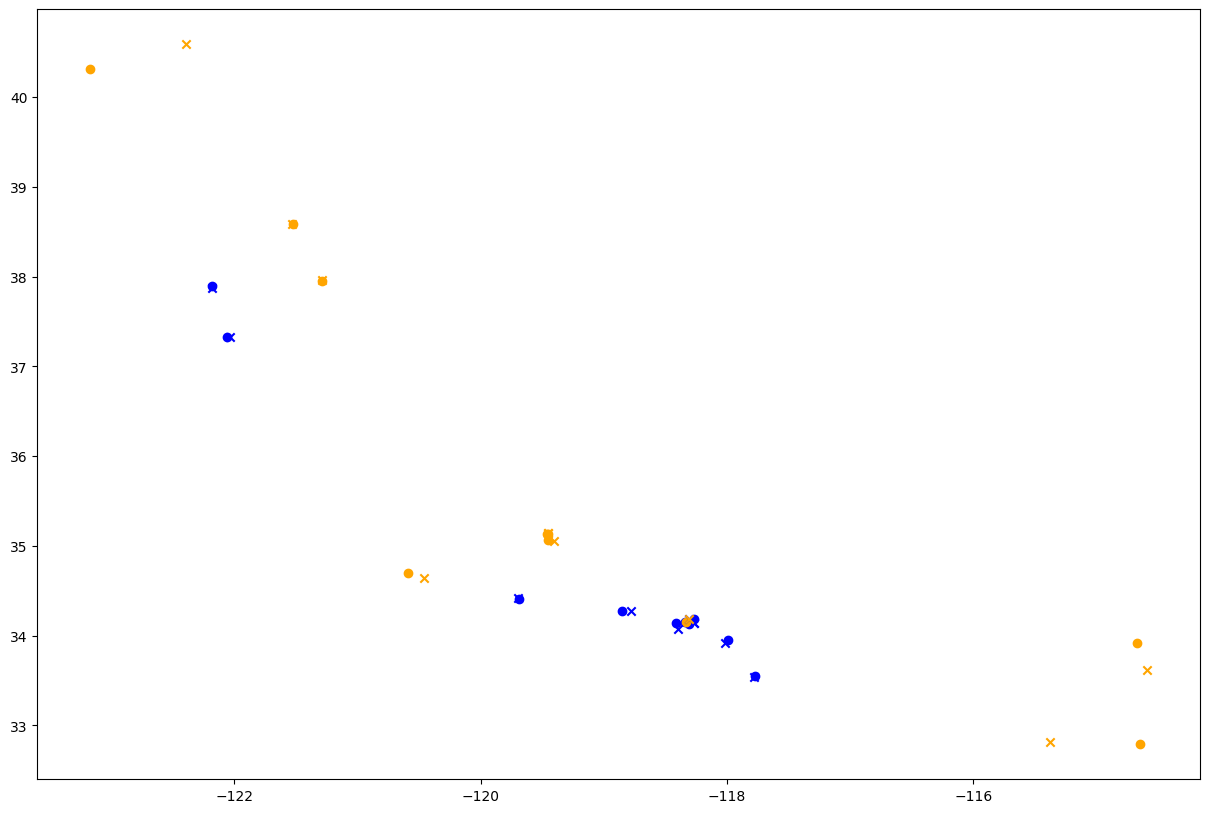

In [46]:
costliest_housing = joined_data.drop_duplicates(subset='median_house_value', keep='last').nlargest(10, 'median_house_value')
cheapest_housing = joined_data.drop_duplicates(subset='median_house_value', keep='last').nsmallest(10, 'median_house_value')

print(costliest_housing['distance_nearest_city'].mean(), cheapest_housing['distance_nearest_city'].mean())

plt.figure(figsize=(15, 10))

plt.scatter(costliest_housing['lon'], costliest_housing['lat'], c='blue', marker='o', label='10 Costliest Housing Prices')
plt.scatter(cheapest_housing['lon'], cheapest_housing['lat'], c='orange', marker='o', label='10 Cheapest Housing Prices')

plt.scatter(costliest_housing['Longitude'], costliest_housing['Latitude'], c='blue', marker='x', label='Nearest Cities')
plt.scatter(cheapest_housing['Longitude'], cheapest_housing['Latitude'], c='orange', marker='x', label='Nearest Cities')


## Median Income vs Median House Value
 Let's see how the median_income and the median_house_value is related in the largest median median_house_value counties compared to the smallest median median_house_value counties:

In [47]:
lgst_values_counties = groupby_nearest_city.nlargest(3, 'median_house_value').reset_index().nearest_city.to_list()
lgst_values_counties

['Brentwood', 'Newport Beach', 'Rolling Hills Estates']

In [48]:
smlst_values_counties = groupby_nearest_city.nsmallest(3, 'median_house_value').reset_index().nearest_city.to_list()
smlst_values_counties

['Tulelake', 'Dorris', 'Calipatria']

In [49]:
joined_housing.query(f"nearest_city in {lgst_values_counties+smlst_values_counties}")

lon    lat  housing_median_age  total_rooms  total_bedrooms  \
2665  -115.52  33.12                38.0       1327.0           262.0   
2666  -115.52  33.13                18.0       1109.0           283.0   
2667  -115.51  33.12                21.0       1024.0           218.0   
2668  -115.46  33.19                33.0       1234.0           373.0   
2669  -115.51  33.24                32.0       1995.0           523.0   
...       ...    ...                 ...          ...             ...   
10817 -117.95  33.63                17.0       6745.0          1547.0   
11439 -117.98  33.61                17.0       2054.0           291.0   
12443 -115.22  33.54                18.0       1706.0           397.0   
18823 -121.62  41.78                40.0       3272.0           663.0   
18824 -121.93  41.86                28.0       4225.0           835.0   

       population  households  median_income  median_house_value  \
2665        784.0       231.0         1.8793             60800.0   
2666       1006.0       253.0         2.1630             53400.0   
2667        890.0       232.0         2.1010             46700.0   
2668        777.0       298.0         1.0000             40000.0   
2669       1069.0       410.0         1.6552             43300.0   
...           ...         ...            ...                 ...   
10817      2688.0      1535.0         3.9917            271600.0   
11439       836.0       288.0         6.8939            383900.0   
12443      3424.0       283.0         1.6250             53500.0   
18823      1467.0       553.0         1.7885             43500.0   
18824      1908.0       686.0         1.7400             44000.0   

      ocean_proximity   nearest_city  distance_nearest_city  
2665           INLAND     Calipatria               0.008094  
2666           INLAND     Calipatria               0.007319  
2667           INLAND     Calipatria               0.006969  
2668           INLAND     Calipatria               0.084144  
2669           INLAND     Calipatria               0.114478  
...               ...            ...                    ...  
10817       <1H OCEAN  Newport Beach               0.023795  
11439      NEAR OCEAN  Newport Beach               0.051825  
12443          INLAND     Calipatria               0.508189  
18823          INLAND       Tulelake               0.226452  
18824          INLAND         Dorris               0.108031  

[179 rows x 12 columns]

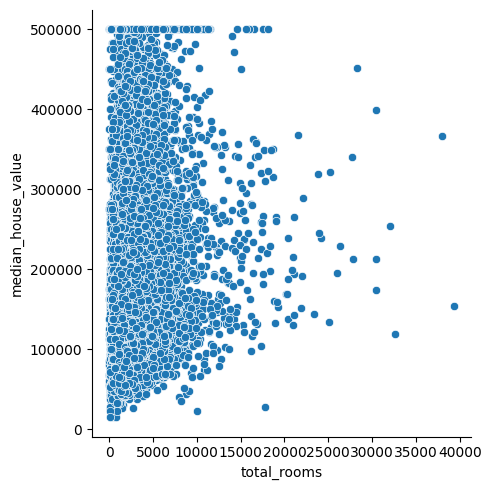

In [50]:
sns.relplot(data=joined_housing, x='total_rooms', y='median_house_value')

In [51]:
joined_housing.corr()['median_house_value']

lon                     -0.042146
lat                     -0.146742
housing_median_age       0.104800
total_rooms              0.134136
total_bedrooms           0.049087
population              -0.024952
households               0.065149
median_income            0.688345
median_house_value       1.000000
distance_nearest_city   -0.143746
Name: median_house_value, dtype: float64

In [52]:
copy = joined_housing.copy()

In [53]:
copy['rooms_per_household'] =  copy['total_rooms'] / copy['households']
copy['population_per_household'] = copy['population'] / copy['households']
copy['bedrooms_per_room'] = copy['total_bedrooms'] / copy['total_rooms']

In [54]:
copy.select_dtypes(include=np.number).corr()['median_house_value']

lon                        -0.042146
lat                        -0.146742
housing_median_age          0.104800
total_rooms                 0.134136
total_bedrooms              0.049087
population                 -0.024952
households                  0.065149
median_income               0.688345
median_house_value          1.000000
distance_nearest_city      -0.143746
rooms_per_household         0.153110
population_per_household   -0.023702
bedrooms_per_room          -0.257254
Name: median_house_value, dtype: float64

## Preparing for regression

In [55]:
data = housing.drop(columns='geometry')

In [56]:
data

lon    lat  housing_median_age  total_rooms  total_bedrooms  \
0     -122.23  37.88                41.0        880.0           129.0   
1     -122.22  37.86                21.0       7099.0          1106.0   
2     -122.24  37.85                52.0       1467.0           190.0   
3     -122.25  37.85                52.0       1274.0           235.0   
4     -122.25  37.85                52.0       1627.0           280.0   
...       ...    ...                 ...          ...             ...   
20635 -121.09  39.48                25.0       1665.0           374.0   
20636 -121.21  39.49                18.0        697.0           150.0   
20637 -121.22  39.43                17.0       2254.0           485.0   
20638 -121.32  39.43                18.0       1860.0           409.0   
20639 -121.24  39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [57]:
X_data = data.drop(columns='median_house_value')
y = data['median_house_value']

In [58]:
cat_features = ["ocean_proximity", "nearest_city"]
numeric_features = list(set(X_data.columns.to_list()) - set(cat_features) - set(['lat', 'lon']))

In [59]:
numeric_features

['housing_median_age',
 'total_rooms',
 'median_income',
 'households',
 'population',
 'total_bedrooms']

In [60]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs 
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do 
    def transform(self, X, y=None):
        geometry_housing = gpd.points_from_xy(X['lon'], X['lat'])
        points_housing = gpd.GeoDataFrame(X, geometry=geometry_housing)

        california_cities = pd.read_csv('cal_cities_lat_long.csv')
        geometry_cal = gpd.points_from_xy(california_cities['Longitude'], california_cities['Latitude'])
        points_cal = gpd.GeoDataFrame(california_cities, geometry=geometry_cal)

        joined_data = gpd.sjoin_nearest(points_housing, points_cal, how='left', distance_col='distance_nearest_city')
        joined_data = joined_data.rename(columns={'Name': 'nearest_city'})

        X = joined_data.drop(columns=['lon','geometry', 'index_right','Latitude','Longitude'])    

        X = X[~X.index.duplicated(keep='first')]
        

        X['rooms_per_household'] = X.total_rooms / X.households
        X['population_per_household'] = X.population / X.households

        if self.add_bedrooms_per_room:
            X['bedrooms_per_room'] = X.total_bedrooms / X.total_rooms
            
        return X
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False) 
#housing_extra_attribs = attr_adder.transform(housing.values)

In [61]:
num_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='median')), 
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(f_classif, k=5))
    ])

cat_transformer = Pipeline(
    steps=[('encoder', OneHotEncoder(handle_unknown="ignore"))])

preprocessor = ColumnTransformer(
    transformers=[
    ('num', num_transformer, numeric_features),
    ('cat', cat_transformer, cat_features)
    ])

In [62]:
reg = Pipeline(
    steps=[('combiner', CombinedAttributesAdder(add_bedrooms_per_room=False)), ('preprocessor', preprocessor), ('classifier', LinearRegression())]
)

X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.3, random_state=42)

In [63]:
reg.fit(X_train, y_train)

#print(f"model score: {reg.score(X_test, y_test)}")

Pipeline(steps=[('combiner',
                 CombinedAttributesAdder(add_bedrooms_per_room=False)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('selector',
                                                                   SelectKBest(k=5))]),
                                                  ['housing_median_age',
                                                   'total_rooms',
                                                   'median_income',
                                                   'households', 'population',
                                                   'total_bedrooms']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ocean_proximity',
                                                   'nearest_city'])])),
                ('classifier', LinearRegression())])

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
scores = cross_val_score(reg, X_test, y_test, cv=12, scoring='neg_mean_squared_error')
reg_rmse_scores = np.sqrt(-scores)

In [65]:
print(f"{reg_rmse_scores.mean():.2f} error with a standard deviation of {reg_rmse_scores.std():.2f}")

54162.10 error with a standard deviation of 2543.61


In [66]:
reg

Pipeline(steps=[('combiner',
                 CombinedAttributesAdder(add_bedrooms_per_room=False)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('selector',
                                                                   SelectKBest(k=5))]),
                                                  ['housing_median_age',
                                                   'total_rooms',
                                                   'median_income',
                                                   'households', 'population',
                                                   'total_bedrooms']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ocean_proximity',
                                                   'nearest_city'])])),
                ('classifier', LinearRegression())])

In [67]:
prediction = reg.predict(X_test)

<AxesSubplot:ylabel='median_house_value'>

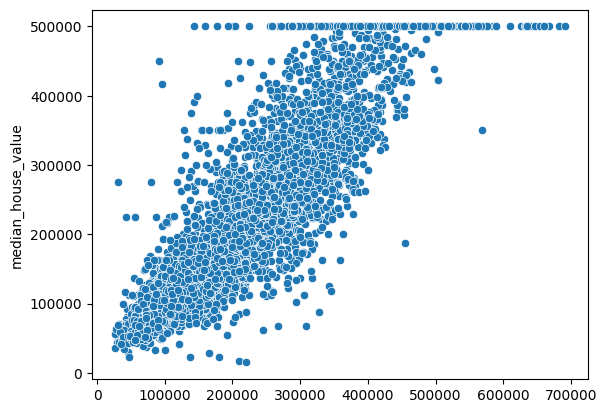

In [68]:
sns.scatterplot(x=prediction, y = y_test)

In [69]:
reg

Pipeline(steps=[('combiner',
                 CombinedAttributesAdder(add_bedrooms_per_room=False)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('selector',
                                                                   SelectKBest(k=5))]),
                                                  ['housing_median_age',
                                                   'total_rooms',
                                                   'median_income',
                                                   'households', 'population',
                                                   'total_bedrooms']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ocean_proximity',
                                                   'nearest_city'])])),
                ('classifier', LinearRegression())])

In [70]:
import pickle

pickle.dump(reg, open('reg.sav', 'wb'))

In [71]:
pickle.dump(reg, open('reg.sav', 'wb'))